## Assignment 6:

### Arun Agarwal
#### 915774866
### Homework 6
3/1/2022

### Problem 1:
1. Illustrate an example of the vanishing gradient problem for a deep neural network (with many hidden layers) if using the sigmoid activation function.
2. What is a way to overcome this problem (explain how)?

1.

The vanishing gradient problem for deep neural networks for certain activation functions, such as the sigmoid activation function, refers to the increasing difficulty in training a network as more layers are added to the neural network due to the gradients of the loss function approaching zero. Activation functions like the sigmoid function "squish" a large input space between the values of 0 and 1. Thus, a large change in the input of the sigmoid function will only output a small change in the output, making the derivative small. The graph below demonstrates this by depicting the sigmoid function and its derivative:
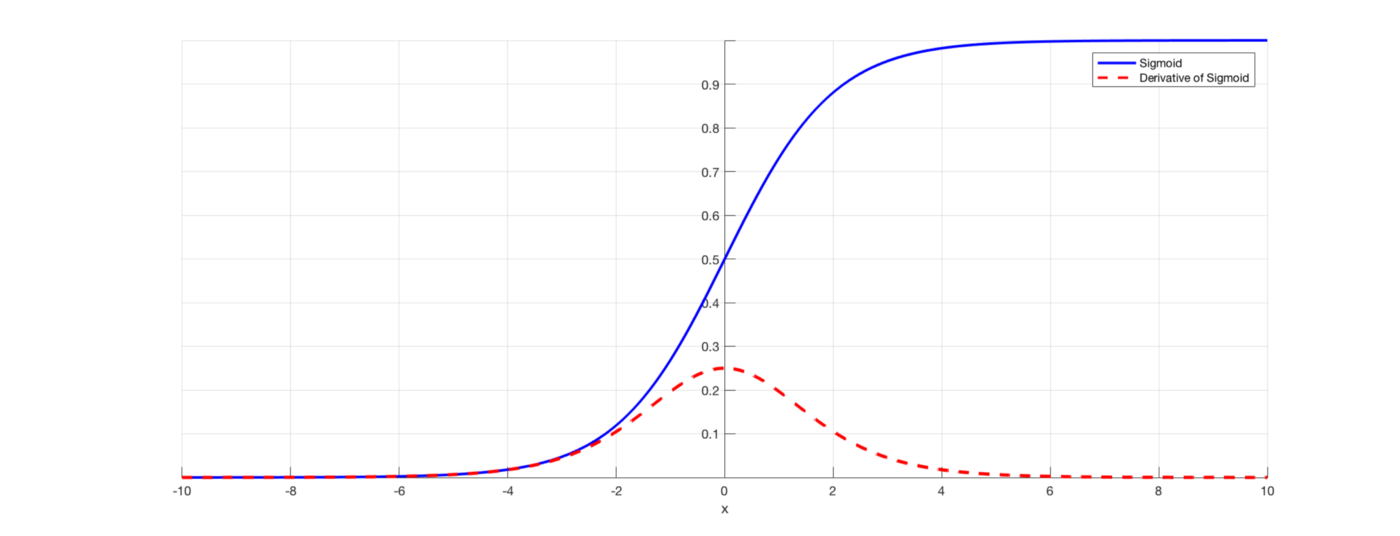

We note that, as the input of the sigmoid function increases or decreases (as |x| grows), the derivatives moves closer to zero (shrinks).

For small networks with only a few hidden layers, using a sigmoid activiation function does not cause as much of an impact. However, for a deep neural network with many hidden layers, the gradient can become too small for training to work effectively. We note that gradients of DNNs are found using backpropagation: finding the derivatives of the network by moving through each layer from the last to the initial one. Using the chain rule, the derivatives are then multiplied while moving down the network (towards the initial layer) to compute the derivatives of the intitial layers. The mininum of the error function is found by iteratively taking small steps in the direction of the negative error derivative with respect to network weights (gradients). The vanishing gradient problem arises when a large number of hidden layers, call this number x, use the signmoid activiation function because this causes x small derivatives to be multiplied together while propagating down to the beginning layers. Since the magnitude of the derivative of the sigmoid function is well below 1.0 throughout the entire range of the function, the gradients vanish exponentially. Such a small gradient causes the weights and biases of the initial layers to not be updated effectively with each training phase (basically preventing the weight from changing its value). This may completely stop the neural network from further training. The vanishing gradient problem is especially an issue since the initial layers are often the most important (they provide crucial information, recognizing the core elements of the input data). Thus, the inaccuracy for these layers leads to large inaccuracy for the whole network. 

As an example/analogy, consider students in a class. Suppose one student, call them student 1, misses one day of class due to sickness, and he/she asks another student in the class, call them student 2, to provide the notes/information explained in class to him/her. Next, suppose that Student 2 is unable to get the time to share the information/notes with student 1. Then, Student 2 asks another student, call it student 3, to instead share the information with Student 1. Student 2 cannot iterate exactly the information that was stated in class to Student 3 (as he may have forgotten some of the information), so suppose he only shares 80% of the information. Similarly, when Student 3 goes to share the information with Student 1, he cannot remember the information exactly for Student 1, so suppose he only shares 80% of Student 2's information with Student 1. Thus, Student 1 is only able to obtain/learn 80% * 80% = 64% of the information from the original lesson. In this example, each student ends up representing a layer in the deep neural network, and by adding more students/layers, the initial layer's (Student 1) learning rate decreases exponentially. For example, if this situation involved 10 students/layers with 80% retention rate, student 1's learning rate would only be 6.8% (80% * 80% * ... * 80% [10 times] = 6.8%), a huge loss. The higher the number of layers, the greater the loss (the gradients vanish). The 80% retention rate represents the effect of the sigmoid activation function. A different activation function may end up creating better results (as discussed below for the second part of this question). For this analogy, a better choice of activation function (such as a ReLu activation function) would mean a higher retention rate such as 95%. 



2.


Simply put, choosing a "better" activation function will help to overcome this issue. By a better activation function, we look for one that does not create a small derivative like the sigmoid function does. One such activation function is ReLU, which is defined as the positive part of its argument: f(x) = x+ = max(0,x), where x is the input to a neuron. Since this function only saturates in one direction (while the sigmoid function saturated in both the negative and positive direction), it suffers less from the vanishing gradient problem. Generally, those activation functions that are non-monotonic, non-saturating, and oscillatory will greatly help to alleviate the vanishing gradient problem. It should be noted that the ReLU function is still not an ideal solution because of dying ReLus; that is, in the intermediate layers of the network, some neurons can die out, or continuously throw 0 as outputs in the training process. Alternative functions are then LReLU, PReLU, ELU, and SELU. I will not go into the details of these here but rather talk about another potential solution.

One of the more modern and effective methods to resolve the vanishing gradient problem is to use residual neural networks (ResNets). These are neural networks where skip connections or residual connections are part of the network architecture. The skip connections allow gradient information to pass through the layers where the output of a previous layer is added to the output of a deeper layer. Thus, information from the earlier part ofs of the network gets passed down to the deeper parts, helping to maintain signal propagation with DNNs. As shown in the image below, the residual connection directly adds the value at the beginning of the block labeled x to the end of the block labeled F(x) + x. Since the residual connection does not go through activation functions that shrink the derivatives, there is a higher overall derivative for the block.

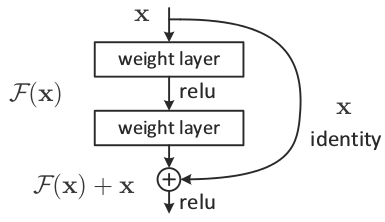
Overall, ResNets yield lower training and test error because of the reintroduction of outputs from the shallower layers in the network to make up for the vanishing data. It should be noted that this solution does not resolve the vanishing gradient problem by preserving gradient flow through each layer, but instead by constructing ensembles of short networks together, avoiding the problem all together. 

Another possible solution would be to use batch normalization layers, which consists of adding an operation in the model just before or after the activation function of each hidden layer. As explained previously, the problem with the sigmoid function is that it maps a large input space to a small space, causing the derivatives to disappear with multiple layers. This is most clearly evident as x grows larger in either direction, as depicted by the sigmoid function below. Batch normalization then solves this issue by normalizing the input so that x does not reach the outer edges of the sigmoid function. It will instead normalize x so that it does not reach the outer edges of the sigmoid function:

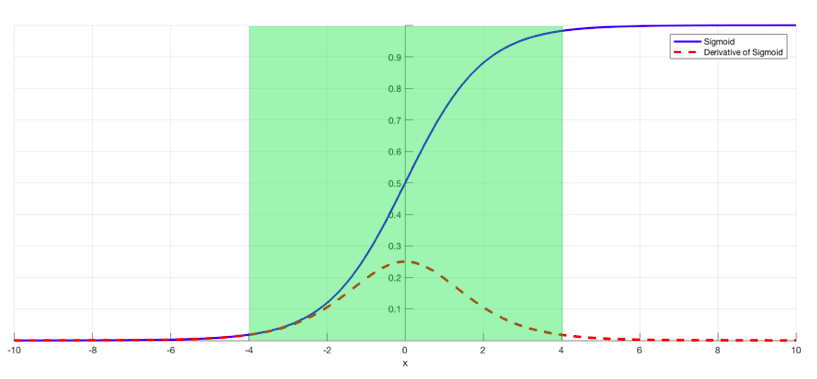
The operation zero-centers and normalizes each input, then scales and shifts the result using two new parameter vectors per layer (scaling vector and shifting vector). That is, the operations allows the model to learn the optimal scale and mean of each of the layer's inputs. 

### Problem 2:
The leader algorithm represents each cluster using a point, known as a leader, and assigns each point to the cluster corresponding to the closest leader unless this distance is above a user-specified threshold. In that case, the point becomes the leader of a new cluster.

(a) What are the advantages and disadvantages of the leader algorithm as compared to K-means?

(b) Suggest ways in which the leader algorithm might be improved.

As stated in the question, the leader algorithm represents each cluster using a point, known as a leader, and assigns each point to the cluster corresponding to the closest leader, unless this distance is above a user-specified threshold. Thus, this is an incremental clustering algorithm that would be most useful for clustering large datasets. The algorithm is order dependent and may form different clusters based on the order that the data set is provided into the algorithm.

To recall, K-means clustering is a simple yet popular unsupervised machine learning algorithm that uses centroids, K different randomly-initiated points in the data, and assigns every data point to the nearest centroid. That is, it partitions n observations into K clusters by grouping each observation to the cluster with the nearest mean.

a) An advantage of the leader algorithm in comparison to K-means is that the leader algorithm only requires a single scan of the data; thus, it is more computationally efficient because each object is compared to the final set of centroids at most one time. In contrast, K-means can require many scans of the data. As stated above, the leader algorithm is order dependent; however, for a fixed ordering of the objects, it always outputs the same set of clusters. In contrast, a large issue/concern with K-means is that different initial partitions can result in different final clusters. K-means also does not work well with clusters in the original data of different sizes and densities. 

A disadvantage of the leader algorithm is that it is not possible to set a certain number of resulting clusters as can be done easily in the K-means algoirthm. The K-means algorithm also produces better quality clusters (tighter clusters, especially if the clusters are not globular) than those produced by the leader algorithm. If the value of K in K-means is kept small, it can even have faster computation time for very large variables. At the same time, it can be difficult to identity the appropiate K-value for K-means, which may make the leader algorithm seem more ideal (where the user is not in charge of determining the appropiate amount of clusters). 

b) One way to improve the leader algorithm is to instead use a sample to determine the distribution of distances between the points. As stated earlier, the leader algorthm assigns each point to the cluster corresponding to the closest leader, *unless* this distance is above a user-specified threshold. Thus, by using a sample as described, one can more effectively and intelligently set the value of this user-specified threshold. Another way to improve the leader algorithm would be to modify the cluster for several thresholds during a single pass. 

### Problem 3:
Traditional agglomerative hierarchical clustering routines merge two clusters at each step.

Does it seem likely that such an approach accurately captures the (nested) cluster structure of a set of data points? If not, explain how you might post-process the data to obtain a more accurate view of the cluster structure.

Agglomerative Hierarchial Clustering is the most common type of hierarchial clustering and is used to group objects in clusters based on their similarity. This algorithm starts by treating each object as a singleton cluster. Then, pairs of clusters can be successively merged until all of the clusters are merged into one large cluster that contains all objects. This forms a tree-like structure (a dendrogram). As stated above, in the traditional agglomerative hierarchial clustering algorithm, it is only the two clusters that are most similar that are combined into one larger cluster. Thus, this approach *does not* accurately capture the nested cluster structure of a set of data points. As an example, if the data contains three distinct clusters, and each of these clusters has some number of sub clusters--without loss of generality, say they contain three, six, and ten subclusters, respectively, then this approach will not adequately capture the nested cluster structure. Ideally, the agglomerative hierarchial clusteering would identify and make three branches (rather than two), one to each of the three main clusters, and then have branches from these to the respective subclusters--thus making three, six, and ten branches, respectively. The traditional agglomerative hierarchial clustering algorithm of course cannot capture/represent the data in this manner. 

One of the final steps in the traditional agglomerative hierarchal clustering algorithm is to determine where to cut the hierarchial tree into clusters to partition the data. Thus, we should post-process the data in a different way to obtain a more accurate view of the cluster structure. One way we could do this is by flattening the hierarchial clustering; traditionally, this means that we will tell the program how many categories to cluster the data into. In this post-processing step, we will move clusters up the tree, which will provide a much more accurate view of the actual cluster structure.

### Problem 4:
Download and install CLUTO software for clustering high dimensional data (http://glaros.dtc.umn.edu/gkhome/cluto/cluto/overview (Links to an external site.)).

Apply this software to cluster Enron Emails dataset available at 

https://archive.ics.uci.edu/ml/datasets/Bag+of+Words (Links to an external site.)

(a) Report clustering results when using partitional clustering in the CLUTO package. You are allowed to apply CLUTO on a sample if the data is too large for your computer. In such a case report the sample size you used and how consistent the result is if you repeat experiments 3 times on 3 samples of that size.

(b) Report results when using agglomerative clustering algorithms in the CLUTO package. In agglomerative clustering compare the results of when using complete-link vs. single-link merging schemes. Then, for single-link merging compare the results when using cosine versus Euclidean distance function.

Before completing parts a and b, we process the data to be usable in CLUTO/sklearn:

In [1]:
import numpy as np

#Ignoring first three rows of dataset
with open('docword.enron.txt') as f:
    lines_after_3 = f.readlines()[3:]

#Putting data into numpy array
File_data = np.loadtxt(lines_after_3, dtype=int)
print(File_data)

[[    1   118     1]
 [    1   285     1]
 [    1  1229     1]
 ...
 [39861 23449     1]
 [39861 25721     1]
 [39861 27196     1]]


In [2]:
#Making labels for the data, the rows, and the cols for the sparse matrix
data = File_data[:, 2]
rowsDocumentNums = File_data[:, 0]
colsWordNums = File_data[:,1]

In [3]:
#Transforming numpy array into sparse array using csr_matrix
from scipy.sparse import csr_matrix

mySparseMatrix = csr_matrix((data, (rowsDocumentNums, colsWordNums)))
mySparseMatrix

<39862x28103 sparse matrix of type '<class 'numpy.intc'>'
	with 3710420 stored elements in Compressed Sparse Row format>

In [4]:
#Checking the shape of the matrix to make sure it is the correct size (which it is, since it has 39861 documents/rows, and 28102 words/columns)
mySparseMatrix.shape

(39862, 28103)

In [5]:
#Transforming Sparse Matrix into Dense Matrix using todense() function:
myDenseMatrix = mySparseMatrix.todense()
myDenseMatrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [6]:
#Since we have not truncated our data yet, we should expect the matrix to be of the same size
myDenseMatrix.shape

(39862, 28103)

In [7]:
#Truncating the Dense Matrix to only contain 5000 documents (to remove chance of running into memory error):
truncatedDense = myDenseMatrix[:5000]
print(truncatedDense)
print(truncatedDense.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(5000, 28103)


In [16]:
#I am now dropping all the columns that contain only 0 values; that is, we are removing those words that do not appear
#in the 5000 documents that I have selected. 
#Doing this operation using a numpy array takes an unusually long time, but is immediate with a pandas dataframe
#Therefore, I transform the matrix into a dataframe, remove all the zero columns, and convert the dataframe back
#into a numpy array to be used in the subsequent steps.
import pandas as pd

df = pd.DataFrame(truncatedDense)
dfTrunc = df.loc[:, (df != 0).any(axis=0)]
finalDenseMatrix = dfTrunc.to_numpy()
finalDenseMatrix.shape

(5000, 19153)

a) We report the clustering results when using the KMeans clustering algorithm available in sklearn. The TA said that, while I was able to download and extract CLUTO successfully, she would be fine with me using sklearn's KMeans. Thus, I have down this below:

In [ ]:
#Since we do not know the best cluster amount to choose (even though it does not matter too much in our case),
# I have created some code to test k (cluster) values in the range of 2 through 100. This uses the elbow method,
#so we can later graph the results to determine where the elbow is (which is the ideal number of clusters to choose).
#However, due to large size of the data, this cell was taking hours to run (and still did not finish).
#Thus, I decided to take the TA's suggestion and choose a cluster amount of 50. Therefore, this cell can be ignored.
from sklearn.cluster import KMeans

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 1000,
    "random_state": 42,
}

#A list to hold the Sum of Square Error values for each cluster amount, k:
sse = []

for k in range(2,100):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(finalDenseMatrix)
    #kmeans.intertia_ calculated by measuring the distance between each data point and its centroid, 
    #squaring this distance, and summing these squares across one cluster. 
    #A good model is one with low inertia AND a low number of clusters ( K )
    sse.append(kmeans.inertia_)

In [ ]:
#This cell was for graphing the SSE results to determine the ideal number of clusters, but since I could not do this,
#you can ignore this cell.

#Plotting the Sum of Square Error values for each cluster amount:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.plot(range(2, 100), sse)
plt.xticks(range(2, 100))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [19]:
kmeans = KMeans(n_clusters=50, init = 'random', n_init = 10, max_iter = 1000, random_state=42).fit(finalDenseMatrix)

print(kmeans.cluster_centers_)

[[-2.16840434e-19  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.16840434e-19  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.16840434e-19  6.50521303e-19  2.71050543e-20 ...  5.42101086e-20
   1.08420217e-19  2.16840434e-19]
 ...
 [ 1.06439596e-03  1.06439596e-03 -1.51788304e-18 ... -3.03576608e-18
  -6.07153217e-18 -1.21430643e-17]
 [ 0.00000000e+00  2.16840434e-19  2.71050543e-20 ...  5.42101086e-20
   1.08420217e-19  2.16840434e-19]
 [ 0.00000000e+00  0.00000000e+00 -2.71050543e-20 ... -5.42101086e-20
  -1.08420217e-19 -2.16840434e-19]]


In [20]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [22]:
kmeans.predict(finalDenseMatrix)

array([47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 17, 47, 47, 47, 34, 34, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 34, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 34, 47, 47, 47, 47, 47, 47, 47,
       47, 42,  5, 47, 47, 47, 47, 47, 13, 47, 47, 47, 47, 47, 47,  5, 47,
       47, 47, 47, 47, 47, 47, 34, 47,  5, 47, 47, 47,  5, 44, 47, 47, 44,
       33, 47,  5, 47, 47, 47, 47, 47, 34, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 34, 34, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 34, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 13, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
        2, 47, 47, 13, 47, 47, 47, 47,  2, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47

The predict function for kmeans shows us how the data was labeled (under which cluster). We see a large number of labels with the cluster number 47. We then see other documents being labeled under other clusters (the large ones being 5, 31, 34, 19). We will see that this same type of pattern exist for the other two samples we take as well:

In [26]:
#Since we took a sample, it was requested we perform the experiment 3 times (with different samples of the same size) 
#and compare the results:

#Truncating the Dense Matrix to only contain 5000 documents (to remove chance of running into memory error):
truncatedDense2 = myDenseMatrix[5000:10000]
print(truncatedDense2.shape)

#Dropping all the columns that contain only 0 values; that is, we are removing those words that do not appear
#in the 5000 documents that I have selected. 

df2 = pd.DataFrame(truncatedDense2)
dfTrunc2 = df2.loc[:, (df2 != 0).any(axis=0)]
finalDenseMatrix2 = dfTrunc2.to_numpy()
print(finalDenseMatrix2.shape)

#Performing Kmeans
kmeans2 = KMeans(n_clusters=50, init = 'random', n_init = 10, max_iter = 1000, random_state=42).fit(finalDenseMatrix2)
print(kmeans2.cluster_centers_)

print(kmeans2.predict(finalDenseMatrix2))

(5000, 28103)
(5000, 17856)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[14  4 42 14 18 14 14  9 14 14 14  4 14 14  4 14 14 14 14 21 18 14 14  9
 14 14 14 18 18 42 14 14 14 14 14 14 14 14 14 14 14 14 14 14  4 14 14  9
  9 14 14 14 14 42 14 11 14 14 18 18 14 14 42 14 14 14 30 14 14 18 14 14
 18 14 14 14 14 14  9 14 14 14 48 14 42 48  9 11 14 14  9 18 14 18 30 14
 27 48 14 11 14 14 14 14 14 14 14 14  2 14 14 14 14 42 18 14 14 14 14  2
 14 42  4 14 14 27 14 14 18 14 14 14 14 14 14 14 14 14 14 14  9 14 14 14
 14 14 14 18 18  4 14 14 14 42 14 14 18 14 14 14 14 18 14 14  9 14 18 42
 14 18 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 11 11 14 42 42 14  4 14 14 14 14 14 14 14  6 18 14 14 14
 14  9 14 14 14 14 42 36 14 14 14 14 14 14 14 14 14 14 14 14  9  4 18 42
 14 14 42 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 45 14 14  4  4 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 48 14 14
 14 14 14 14 14 14 14 14 14 48 14 14 14 30 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 36 14 14 14 14 14 14 14 14 48 14 14

We print out the size of the matrix before removing the word columns that do not appear in any of the 5000 sample documents and the size after removing these columns. Even though this matrix has a different number of words after removing those that do not appear in any of the documents than the number of words in the first sample (as well as the third sample below), we can see that the sample performed very similarly with Kmeans of 50 clusters. There is one cluster that a lot of documents are classified under (specifically, number 14), and other clusters that appear relatively frequently (such as 48, 22, and 6). We again see this pattern for the third sample picked, suggesting our model did in fact peform relatively the same, no matter the sample chosen. 

In [28]:
#Since we took a sample, it was requested we perform the experiment 3 times (with different samples of the same size) 
#and compare the results:

#Truncating the Dense Matrix to only contain 5000 documents (to remove chance of running into memory error):
truncatedDense3 = myDenseMatrix[10000:15000]
print(truncatedDense3.shape)

#Dropping all the columns that contain only 0 values; that is, we are removing those words that do not appear
#in the 5000 documents that I have selected. 

df3 = pd.DataFrame(truncatedDense3)
dfTrunc3 = df3.loc[:, (df3 != 0).any(axis=0)]
finalDenseMatrix3 = dfTrunc3.to_numpy()
print(finalDenseMatrix3.shape)

#Performing Kmeans
kmeans3 = KMeans(n_clusters=50, init = 'random', n_init = 10, max_iter = 1000, random_state=42).fit(finalDenseMatrix3)
print(kmeans3.cluster_centers_)

print(kmeans3.predict(finalDenseMatrix3))

(5000, 28103)
(5000, 16165)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[15 15  9 15 15 15 15 24 15 19 15 15 15 45 15 15 33 15 15 45 15 15 15 24
 15 15 15 15 15 15 15 15 24 45 12 15 15 15 16 15 15  5 45 15 15 15 14 15
 15 15 15 15 15 15 24 15 12 15 15 15 15 15 15 15 15 15 43 45 15 15 15 24
 45 15 15 34 15 15  5 15 15 15 15  5  5 15 15 15 24 15 15 15 15 15 15 15
 15 15 24 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 35 32 15 15 15 15 15 15 15 15 15 15 14 15 24 15
 45 15  5  5 15 15 15 15 24 15 38 24 38 24 15 15 45 15 24 45 45 15 24 15
 15 15 15 15 24 38 15 45 45 24 45 15 15 24 24 45 15 15 24 45 24 45 24 45
 15 15 45 15 15 15 15 15 15 45 15 15 15 15 15 15 15 15 24 15 15 15 45 15
 24 15 33 33 15 45 30 45 12 15 15 45 15 15 30 16 30 30 15 15 15 32 15 15
 15 15 15 32 15 15 15 24 15 15 24 15 15 15 15 15 15 15 32 14 15 32 15 15
 15 15 15 15 14 15 15 24 15 15 15 15 15 15 15 15 24 15 15 14 15 15 15 24
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 32 15 15 15 15 15
 15 15 15 15 15 15 10 15 15 15 32 15 15 15 32 15 15

We print out the size of the matrix before removing the word columns that do not appear in any of the 5000 sample documents and the size after removing these columns. Even though this matrix has a different number of words after removing those that do not appear in any of the documents than the number of words in the first or second sample, we can see that the sample performed very similarly with Kmeans of 50 clusters. There is one cluster that a lot of documents are classified under (specifically, number 15), and other clusters that appear relatively frequently (such as 24, 5, and 12). We have seen this pattern for all three samples (of course, with different cluster numbers), suggesting our model did in fact peform relatively the same, no matter the sample chosen. It is fair to assume that, for these samples, there are certain types documents that are appearing in high frequencies (maybe related to cars, or biology, for example), so that we see those clusters being very large. 

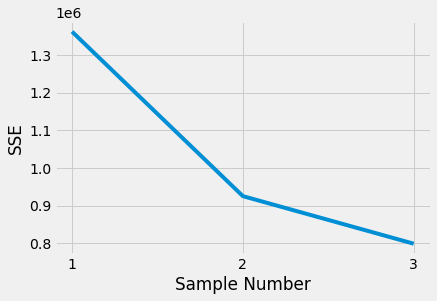

In [30]:
#A list to hold the Sum of Square Error values for each sample, k:
sse = []
sse.append(kmeans.inertia_)
sse.append(kmeans2.inertia_)
sse.append(kmeans3.inertia_)

#Plotting the Sum of Square Error values for each sample:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.plot(range(1, 4), sse)
plt.xticks(range(1, 4))
plt.xlabel("Sample Number")
plt.ylabel("SSE")
plt.show()

I wanted to see the sum of square error values for each sample, and we see that that the values are relatively close (when considering the scale of the y-axis). We achieve an elbow shape that one would see when comparing different k (number of cluster values), which if analogic to this situation, would suggest that the second sample was the most ideal sample for the kmeans algorithm with 50 clusters. Nonetheless, the samples performed relatively equally. 

Note: if there is doubt that these sse values are actually considered relatively close, one can run the cell above when I used the elbow method to try and determine the best value for k, and they will see that the sse value ranged from around .7 up to a value of 10, suggesting that the values in the graph above, which only range from .8 to 1.3, are relatively similar.

b) We now report results when using agglomerative clustering algorithms using sklearn. Again, the TA said that, while I was able to download and extract CLUTO successfully, she would be fine with me using sklearn's Agglomerative Clustering. 

In agglomerative clustering, we will compare the results of when using complete-link vs. single-link merging schemes. Then, for single-link merging, we will compare the results when using cosine versus Euclidean distance function.

In [31]:
#First, we perform agglomerative clustering on the finalDenseMatrix using complete-link and single-link merging schemes:

from sklearn.cluster import AgglomerativeClustering

clusteringCompleteLink = AgglomerativeClustering(linkage = 'complete').fit(finalDenseMatrix)

In [32]:
clusteringSingleLink = AgglomerativeClustering(linkage = 'single').fit(finalDenseMatrix)

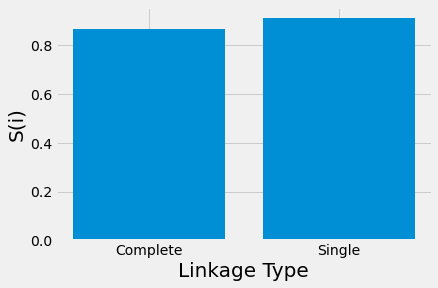

In [33]:
from sklearn.metrics import silhouette_score

linkageType = ['Complete', 'Single']
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(finalDenseMatrix, clusteringCompleteLink.fit_predict(finalDenseMatrix)))
silhouette_scores.append(
        silhouette_score(finalDenseMatrix, clusteringSingleLink.fit_predict(finalDenseMatrix)))
  
# Plotting a bar graph to compare the results
plt.bar(linkageType, silhouette_scores)
plt.xlabel('Linkage Type', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

We now see the silhouette scores when using complete linkage and single linkage. Silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. A value of 1 means clusters are well apart from each other and clearly distinguished. Since both the complete linkage scheme and single linkage scheme have high silhouette scores, the agglomerative clustering algorithm performed well in both cases. However, the single linkage case did slightly better, as seen by its slightly higher silhouette score. 

Now, we perform agglomerative clustering on the finalDenseMatrix using cosine and Euclidean distance functions for a single-link merging scheme.

When running this with cosine affinity, I was originally getting a weird error that says that the operation could not be performed because I had zero vectors in the matrix. I am confused why I am getting this error message because I already removed all the zero columns in the matrix. There should not be any zero rows in the matrix because every row contains at least one word.

Nonetheless, I do the operation to remove the zero rows as well, and the cell then runs:

In [40]:
df = pd.DataFrame(truncatedDense)
dfTrunc = df.loc[:, (df != 0).any(axis=0)]
dfTrun2 = dfTrunc.loc[(dfTrunc!=0).any(axis=1)]
finalDenseMatrix = dfTrunc2.to_numpy()
finalDenseMatrix.shape

(5000, 17856)

In [41]:
clusteringSingleLinkCosine = AgglomerativeClustering(n_clusters = 50, linkage = 'single', affinity = 'cosine').fit(finalDenseMatrix)

In [36]:
clusteringSingleLinkEuclidean = AgglomerativeClustering(n_clusters = 50, linkage = 'single', affinity = 'euclidean').fit(finalDenseMatrix)

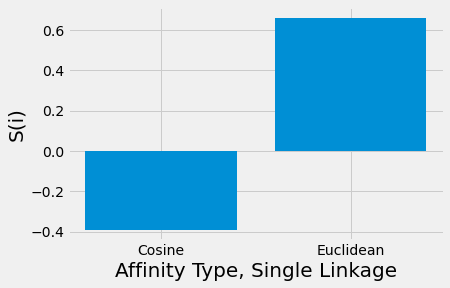

In [42]:
affinityType = ['Cosine', 'Euclidean']
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(finalDenseMatrix, clusteringSingleLinkCosine.fit_predict(finalDenseMatrix)))
silhouette_scores.append(
        silhouette_score(finalDenseMatrix, clusteringSingleLinkEuclidean.fit_predict(finalDenseMatrix)))
  
# Plotting a bar graph to compare the results
plt.bar(affinityType, silhouette_scores)
plt.xlabel('Affinity Type, Single Linkage', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

Once more, we can see the silhouette scores when using cosine distance vs euclidean distance for single linkage. We can see that the Euclidean distance scheme performed well since it has a high silhouette score, but the silhouette score is very low (in the negatives) for the cosine similarity. I believe this is beceause I had to, confusingly, delete zero vectors from the matrix when they should have already have been removed. If this is in fact how the results are meant to turn out, then the euclidean distance scheme for agglomerative clustering performed better.

### Problem 5:

Propose a ranked list of five Knowledge Discovery and Data Mining topics of which you would possibly learn one on your own and present as a mini-lecture in class. Mini-lecture topics will be assigned by considering your preferences, but if multiple people rank the same topic as their preference, this topic will be assigned to one who provides the most convincing references which will be used to prepare the presentation.

Mini-lectures will be presented on March 24, March 31, April 7, and April 14, and the order will be determined based on topics and announced by March 14.

The proposed topics for mini-lectures should be different from topics already discussed in class. Each topic should be appropriate for a 15-minute presentation. You can prepare a presentation based on materials from two textbooks, but you are also allowed to use conference tutorial slides, articles etc. Following are possible topics to consider (you can also propose different topics relevant to Knowledge Discovery and Data Mining):

    Large scale hierarchical classification
    Advanced concepts in cluster analysis
    Association rules mining
    Advanced concepts in association analysis
    Anomaly detection
    Data stream mining
    Text and web mining
    Time-series mining
    Mining big time series
    Sequence pattern mining
    Survival analysis
    Mining spatial data
    Mining graphs
    Graphs sketching, sampling, streaming
    Mining web data
    Mining social networks
    Privacy-preserving data mining
    Mining Spatio-temporal data
    Mining semistructured data
    Mining with constraints
    False discoveries
    Lifelong machine learning
    Deep Bayesian mining
    Data mining for drug discovery
    Mining electronic health records
    Data mining in transportation
    Data mining in power systems
    Sports analytics
    Explainable data modeling
    Active learning
    Human-in-the-loop learning
    Visual analytics
    Fairness-aware machine learning
    Transfer learning
    Fake news detection
    Zero-shoot learning
    Mining temporal networks
    Reinforcement learning
    Graph neural networks
    Deep reinforcement learning
    Deep learning for personalized search and recommender systems
    A/B testing at scale

Here is my ranked list of Knowledge Discovery and Data Mining topics I would be interested in presenting about:
1. Anomaly Detection
2. Fake News Detection
3. Reinforcement Learning
4. Sports Analytics
5. Data Mining for Drug Discovery
6. Data Mining in Transportation
7. Zero-shot Learning
8. Mining Spatial Data
9. Survival Analysis
10. Text and Web Mining

I have provided more than five sources because there were a total of 10 that really interested me. I felt that there wouldn't be a harm in including more than five, since one can ignore the ones listed after number 5 if need be.

I will now list the references/resources I found for each topic.

1. Anomaly Detection:

I am really interested in this subject due to its relevance to my upcoming internship at Vanguard as well as its general usefulness for data scientists.

- https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1#:~:text=Anomaly%20detection%20is%20the%20process,known%20as%20unsupervised%20anomaly%20detection.
Susan Li’s article in towardsdatascience discusses what anomaly detection is and its purpose. It also provides numerous helpful examples of the subject and solutions to dealing with anomalies.
- https://en.wikipedia.org/wiki/Anomaly_detection
This Wikipedia article on Anomaly detection provides a great overview on Anomaly Detection. Specifically, it discusses the applications, popular techniques, application to data security, usefulness for data pre-processing, and more.

- https://avinetworks.com/glossary/anomaly-detection/
This article from avinetworks provides more details on certain aspects of anomaly detection (such as more information of what anomalies are and what are some use cases).
- https://blogs.oracle.com/ai-and-datascience/post/introduction-to-anomaly-detection
Oracle has its own article on anomaly detection, which provides more organized and structured examples and listings of different types. It also provides sample code.
- https://www.anodot.com/blog/what-is-anomaly-detection/
Anodot’s article on anomaly detection provides standard information on the topic as well as discussing the types of outliers and why it is important in a company setting. It also provides a link to a helpful video on the subject.

- Chapter 9 of our Textbook, *Introduction to Data Mining*, discusses many of the details of Anomaly Detection including characteristics of anomaly detection problems and methods, statistical approaches, proximity-based approaches, clustering-based approaches, reconstruction-based approaches, one-class classification, and evaluation of anomaly detection.

2. Fake News Detection:

I am a part of the undergraduate research program as well as the science scholars program at Temple University, and one research oppportunity for undergraduates involved fake news detection. Unfortunately, I had numerous research opportunities I was interested in and could only select one. Since I could not do further research into fake news detection at that point, I would love to be able to do so now!

- Article: Fake News Detection Using Machine Learning Approaches, https://iopscience.iop.org/article/10.1088/1757-899X/1099/1/012040/pdf 
Z Khanam et al 2021 IOP Conf. Ser.: Mater. Sci. Eng. 1099 012040
Khanam’s article provides a list of relevant data science topics for fake news detection including natural language processing, text data mining, machine learning classification, decision trees, random forests, support vector machines, and more. It also discusses the methodology for classifying news as well as providing an example
- Article: Fake News Detection Using Machine Learning Ensemble Methods
https://www.hindawi.com/journals/complexity/2020/8885861/ 
Iftikhar Ahmad, Muhammad Yousaf, Suhail Yousaf, Muhammad Ovais Ahmad, "Fake News Detection Using Machine Learning Ensemble Methods", Complexity, vol. 2020, Article ID 8885861, 11 pages, 2020. https://doi.org/10.1155/2020/8885861
This provides an introduction/abstract for fake news detection, discusses methods that can be used, and provides results and a conclusion. 
- https://www.frontiersin.org/articles/10.3389/fphy.2021.685730/full
The article “Detection of Fake News on COVID-19 on Web Search Engines” specifically discusses the detection of false news with relevance to the prevalent issue of COVID-19, which I believe would make an interesting discussion point if I am chosen for this topic.
- https://towardsdatascience.com/detecting-fake-news-with-and-without-code-dd330ed449d9
Favio Vazquez’s article, “Detecting Fake News With and Without Code”, provides an excellent source of information for comparing fake news detection with and without using code. This is especially useful for a presentation on this topic in this class because it can provide more insight into why treating this issue with a data scientist mindset is relevant.
- https://towardsdatascience.com/fake-news-detection-with-machine-learning-using-python-3347d9899ad1
This is another article that discusses fake news detection using machine learning.
- Article: “Using Data Science to Detect Fake News”
https://commons.lib.jmu.edu/cgi/viewcontent.cgi?article=1754&context=honors201019
Shoemaker, Eliza, "Using data science to detect fake news" (2019). Senior Honors Projects, 2010-current. 714
- https://www.analyticsvidhya.com/blog/2021/07/detecting-fake-news-with-natural-language-processing/
An article that discusses detecting fake news with a focus on using natural language processing
- https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/
This is another article that discusses fake news detection using machine learning.
- Chapters 12 and 13 of Aggarwal’s book, Data Mining the Textbook, have a few parts that talk about mining newswire services to detect fake news

3. Reinforcement Learning:

- https://www.techtarget.com/searchenterpriseai/definition/reinforcement-learning#:~:text=Reinforcement%20learning%20is%20a%20machine,learn%20through%20trial%20and%20error.
This article from Techtarget provides a comprehensive overview into what reinforcement learning is and its purpose.
- https://en.wikipedia.org/wiki/Reinforcement_learning
This Wikipedia article on reinforcement learning provides an introduction to the topic, algorithms used, and further research being done in the area.
- https://www.geeksforgeeks.org/what-is-reinforcement-learning/
The GeeksforGeeks article discusses the basics of reinforcement learning and provides code examples.
- https://towardsdatascience.com/reinforcement-learning-101-e24b50e1d292
The towardsdatascience article discusses the very basics of reinforcement learning.
- https://deepsense.ai/what-is-reinforcement-learning-the-complete-guide/
Konrad Budek’s article, “What is reinforcement learning? The complete guide”, provides a very thorough guide to the topic, as the name suggests. It provides examples, history, challenges, videos, comparisons to other learning methods, and its relevance to the future of machine learning and data science overall.
- https://www.synopsys.com/ai/what-is-reinforcement-learning.html
While this article from synopsys repeats a lot of the information on reinforcement learning discussed in the above articles, it also does a great job of explaining the process/how it works.


4. Sports Analytics:

My old roomate plans to focus his career in this area, and from what he has told me, it sounds like a really fascinating and opportunity-filled area. I would love to learn a bit more about it.

- https://en.wikipedia.org/wiki/Sports_analytics
This Wikipedia article discusses sports analytics without taking a technical dive/data science outlook to the subject, which I think is useful for comparison in my presentation (to showcase how data science techniques can help in the sport world).
- https://www.discoverdatascience.org/industries/sports/#:~:text=Sports%20statisticians%20(or%20analysts)%20will,scientists%20for%20the%20sports%20industry.
Discoverdatascience’s article, “Data Science and the Sports Industry”, provides an excellent guide on how data science is extremely relevant to the sport world. 
- https://towardsdatascience.com/sports-analytics/home
This article provides further information into the intersection between data science and athletics. 
- https://www.mastersindatascience.org/resources/big-data-in-sports/
This article from mastersindatascinece discusses the use of big data in sports. 
- https://builtin.com/big-data/big-data-companies-sports
This news article specifically focuses on how big data companies are of help to the sport industry today, which I think will be an interesting subject to talk about in my presentation.
- Both of our textbooks also offer some examples throughout the text of the relevance of data science to sports.

5. Data Mining for Drug Discovery:

I have never thought about using data mining techniques for drug discovery, so I am really fascinated to learn how these subjects can be and have been connected to create breakthroughs in the area.

- https://www.ddw-online.com/data-mining-in-the-pharmaceutical-industry-814-200110/#:~:text=Data%20mining%20is%20a%20process,R%26D%2C%20clinical%20trials%20and%20marketing.
This article discusses how data mining is prevalent in the pharmaceutical industry; that is, it dives into how the patterns data mining techniques can find with pharmaceutical data can be used to make accurate predictions to solve various types of drug-related issues (drug development, marketing, crimes, etc.).
- https://www.frontiersin.org/articles/10.3389/fchem.2018.00162/full
This article describes machine learning models that can be used for predicting drug likeness and their disease or organ category.
- https://www.wiley.com/en-us/Data+Mining+in+Drug+Discovery-p-9783527329847
This article from wiley provides a very thorough guide into how data mining has been used in drug discovery.
- https://www.sciencedirect.com/science/article/pii/B9780128015599000090
This is another article that discusses data mining with relevance to drug discovery and design. 
- https://www.longdom.org/open-access/data-mining-in-drug-discovery-60685.html
This article from longdom discusses the usefulness of data processing to drug discovery. 
- https://doc.lagout.org/Others/Data%20Mining/Data%20Mining%20in%20Drug%20Discovery%20%5BHoffmann%2C%20Gohier%20%26%20Pospisil%202013-12-04%5D.pdf
This pdf is an entire textbook focusing on data mining in drug discovery.
- Both of our textbooks have references to the usefulness of data mining techniques for drug discovery throughout their text. 

6. Data Mining in Transportation:

I really like how this topic has very specific use-cases when using data science techniques, such as for engineering of the transportation system, safety improvement, traffic density, and more. 

- https://www.tandfonline.com/doi/pdf/10.1080/16483840.2003.10414100
This article discusses data mining applications in transportation engineering. 
- https://library.ndsu.edu/ir/handle/10365/28877
This link consists of a study in which data mining models are tested in transportation safety research to prove their feasibility to serve as alternative models in the transportation industry.
- https://www.sciencedirect.com/science/article/pii/S2352146516307177
This article from science direct specifically discusses the application of data mining techniques to measuring (and improving) traffic density.

7. Zero-shot Learning:

- https://en.wikipedia.org/wiki/Zero-shot_learning
This Wikipedia article discusses the basics on what zero-shot learning is. 
- https://towardsdatascience.com/understanding-zero-shot-learning-making-ml-more-human-4653ac35ccab
Discusses what zero-shot learning is (a model learns to recognize things that it has not explicitly seen before in training)
- https://learnopencv.com/zero-shot-learning-an-introduction/
This article from learnopencv provides an introduction to the issue.
- https://www.kdnuggets.com/2021/04/zero-shot-learning.html
This article provides further information on to how zero-shot learning works.
- https://paperswithcode.com/task/zero-shot-learning
This article discusses Zero-shot learning and provides code examples of the topic.
- https://deepchecks.com/glossary/zero-shot-learning/
This is another article that provides an introduction to zero-shot learning.

8. Mining Spatial Data:

- https://www.techopedia.com/definition/30595/spatial-data-mining#:~:text=Spatial%20data%20mining%20is%20the,into%20relevant%20and%20useful%20formats.
Link about what spatial data mining is.
- https://www.tutorialspoint.com/what-is-spatial-data-mining
This article discusses what spatial data mining is.
- https://www.geeksforgeeks.org/difference-between-spatial-and-temporal-data-mining/
This article from Geeks for Geeks differentiates spatial and temporal data mining. 
- https://www.sciencedirect.com/topics/earth-and-planetary-sciences/spatial-data-mining
This article provides an overview into spatial data mining.
- Chapter 2 of the textbook, Introduction to Data Mining, discusses what Spatial Data is.

9. Survival Analysis:

This subject simply sounds really cool to me. I am interested in how we are able to analyze the expected duration of time until an event occurs.

- https://towardsdatascience.com/introduction-to-survival-analysis-6f7e19c31d96
This article provides an introduction to survival analysis.
- https://towardsdatascience.com/tagged/survival-analysis
This article provides further information into survival analysis. 
- https://medium.com/@ODSC/when-to-use-survival-analysis-applications-in-industry-data-science-d8bfb7566f43
This article discusses the applications of survival analysis and when to use it.

10. Text and Web Mining:

- https://scionanalytics.com/differences-between-web-mining-and-text-mining/
This article differentiates text and web mining.
- https://blog.eduonix.com/internet-of-things/web-mining-text-mining-depth-mining-guide/
This article provides an in-depth guide to web and text mining.
- https://www.ibm.com/cloud/learn/text-mining
This article specifically discusses text mining.
- https://www.geeksforgeeks.org/difference-between-data-mining-and-text-mining/
This article from GeeksforGeeks provides more detailed information into the difference between data mining and text mining
- Both of our textbooks have references to text and web mining throughout their text. 